Carregamento das bibliotecas que serão utilizadas neste notebook.

In [18]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.signal import stft, resample, welch
from scipy.fft import fft, ifft
from scipy import signal
from copy import deepcopy as dc
from sklearn.preprocessing import LabelEncoder
import mne

FS = 512

Carrega os dados anteriores

In [19]:
data = np.load('../../datasets/avi/beta/data_beta.npy')
labels = np.load('../../datasets/avi/beta/labels_beta.npy')
channels = np.load('../../datasets/avi/beta/channels_beta.npy')
data.shape, labels.shape, channels.shape

((160, 64, 750), (40,), (64,))

Implementação de cada um dos filtros: passa-faixa (bandpass), passa-baixa (lowpass), passa-alta (highpass) e corta-faixa (notch).

In [20]:
def print_graphs(data):
    for i in range(data.shape[0]):
        plt.plot(data[i,:])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(data.shape[0]):
        plt.psd(data[i,:], Fs=FS)
    plt.title('Domínio da frequência')
    plt.show()
    
    for i in range(data.shape[0]):
        plt.specgram(data[i,:], Fs=FS)
    plt.title('Espectrograma')
    plt.show()

Visualização do sinal de todos os dados sem filtro para

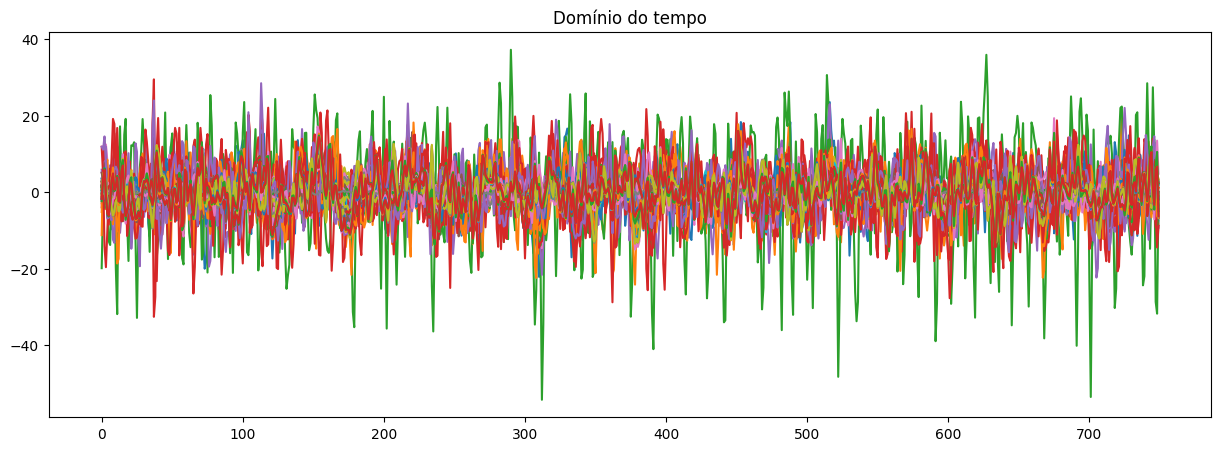

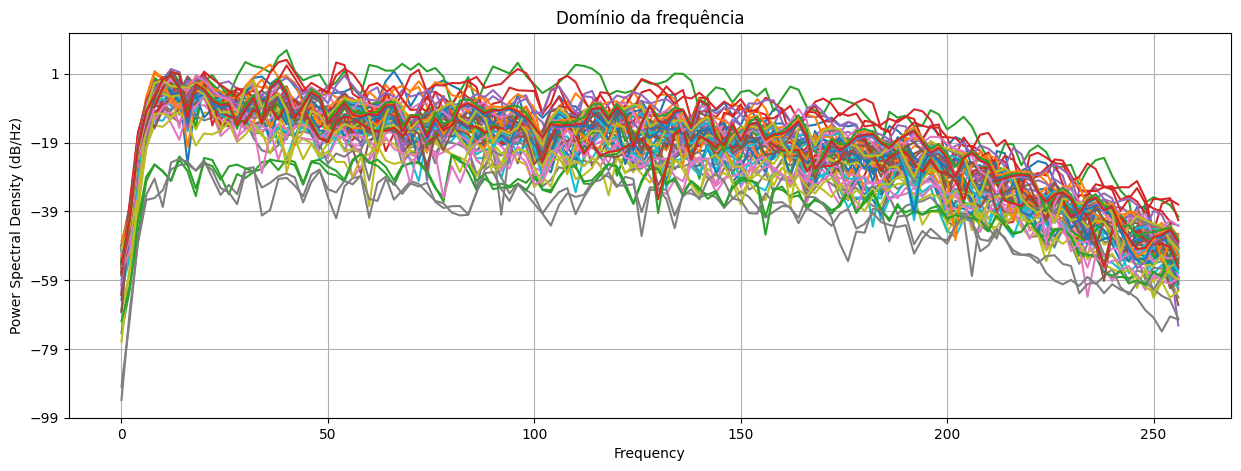

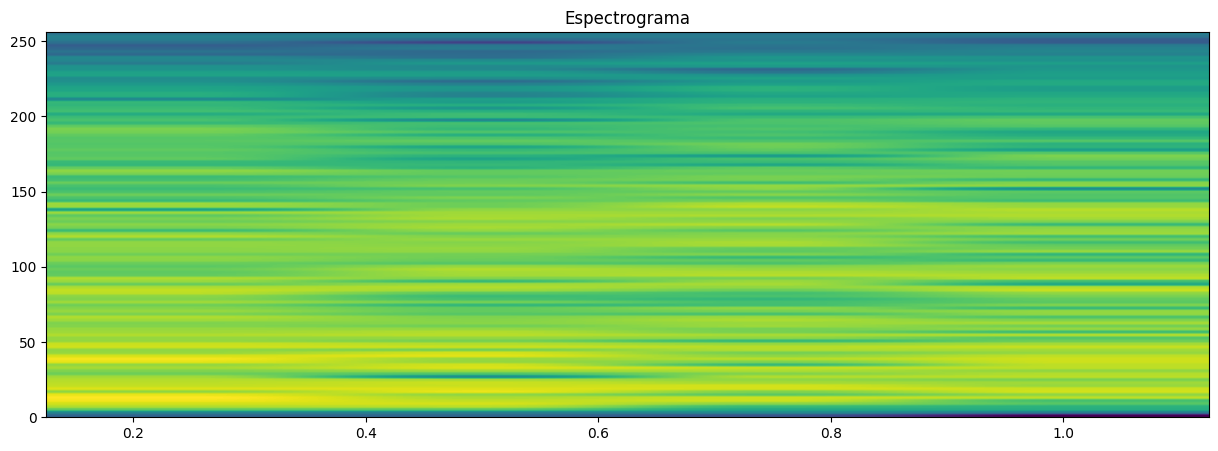

In [21]:
rcParams['figure.figsize'] = [15., 5.]
print_graphs(data[6])

In [22]:
nchannels = 64
sfreq = 512
ch_names = [i for i in channels]
ch_types = ['eeg' for i in range(nchannels)]

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 512.0 Hz
>

In [23]:
# Ajustando para o formato do MNE
labels2 = np.array([np.transpose(data) for data in labels]*4)
labels2

unique_labels = sorted(set(labels))
labels2.shape, len(unique_labels)
event_dict = {str(round(value,2)): index  for index, value in enumerate(unique_labels)}

data_correct = data

le = LabelEncoder()
events = np.column_stack((
    np.array(range(len(labels2))),
    np.zeros(160, dtype=int),
    le.fit_transform(labels2))
)
mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)

Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


### Filtrando e salvando os dados
Depois montar o epoch, vamos fazer um filtro para remover as frequencias que não serão úteis

In [24]:
filtered_mne_data = mne_data.filter(6, 18)
filtered_mne_data.save("../../datasets/avi/beta/beta.fif", overwrite=True)

Setting up band-pass filter from 6 - 18 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Upper passband edge: 18.00 Hz
- Upper transition bandwidth: 4.50 Hz (-6 dB cutoff frequency: 20.25 Hz)
- Filter length: 845 samples (1.650 s)



C:\Users\maran\AppData\Local\Temp\ipykernel_3740\2430382943.py:1: RuntimeWarning: filter_length (845) is longer than the signal (750), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_mne_data = mne_data.filter(6, 18)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Overwriting existing file.


[Parallel(n_jobs=1)]: Done 10240 out of 10240 | elapsed:    1.3s finished
C:\Users\maran\AppData\Local\Temp\ipykernel_3740\2430382943.py:2: RuntimeWarning: This filename (../../datasets/avi/beta/beta.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  filtered_mne_data.save("../../datasets/avi/beta/beta.fif", overwrite=True)
